### <font color="blue">DATA SCIENCE PROGRAMMING (CMP-262-26222)</font> ##
### PROJECT 1 ###

*<font color="blue">Description</font>: An exploratory data analysis of the CCM Computing Courses Entry Surveys using Python to provide insights that can help the Information Technologies department increase enrollment in computing classes. The Exploratory Data Analysis process will be followed to provide these recommendations.*

### Questions to answer ###
1.	What influences joining computing classes ( the pull factors)?
2.	What made the most impact on the decision to enroll at CCM?
3.	What are the factors that are associated with high levels of interest (correlation)?
4.	For each course in the latest survey, what are the relative number of enrollments in the various degree programs? The degree field needs to be cleaned and condensed into a smaller number of categories. For example, all the engineering majors should be collapsed into a single engineering category.

In [68]:
import pandas as pd
print(pd.__version__)

df = pd.read_csv("C:/Users/pmush/OneDrive/Desktop/Data Science Prog/Non-Majors Survey Results - Fall 2024.csv")


In [69]:
interestcorrraw = df[['Which course are you currently enrolled in?', 'What degree program are you currently enrolled in?', 'On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?', 'Age ', 'Race/ethnicity', 'Gender']]
interestcorr = interestcorrraw.rename(columns = {'Which course are you currently enrolled in?' : 'COURSE', 'What degree program are you currently enrolled in?' : 'DEGREE','On a scale of 1 to 5, with 1 being not at all interested and 5 being extremely interested, how interested are you taking more courses in Computer Science, Information Technology or Game Development?' : 'LEVEL_OF_INTEREST', 'Age ' : 'AGE', 'Race/ethnicity': 'RACE/ETHNICITY', 'Gender': 'GENDER'})
interestcorr

,COURSE,DEGREE,LEVEL_OF_INTEREST,AGE,RACE/ETHNICITY,GENDER
0,CMP 126 Computer Technology and Applications,Liberal Arts,2,19-20,Hispanic or Latino;Black/African American;Whit...,Prefer not to say
1,CMP 126 Computer Technology and Applications,child psychology,3,19-20,Hispanic or Latino,Woman
2,CMP 126 Computer Technology and Applications,Broadcasting Arts and Technology,5,18 and younger,Choose not to reply,Man
3,CMP 126 Computer Technology and Applications,analyst,3,19-20,Hispanic or Latino,Man
4,CMP 101 Computer Information Literacy,Journalism,3,19-20,White/Caucasian,Woman
...,...,...,...,...,...,...
87,CMP 101 Computer Information Literacy,Early Childhood Education,3,21-24,Hispanic or Latino;White/Caucasian,Woman
88,CMP 126 Computer Technology and Applications,Liberal Arts,3,19-20,Hispanic or Latino,Woman
89,CMP 126 Computer Technology and Applications,Liberal Arts,1,19-20,Black/African American,Woman
90,CMP 101 Computer Information Literacy,Nursing,3,19-20,Hispanic or Latino,Man


In [70]:
interestcorr.loc[34, 'DEGREE'] = 'Nursing'
interestcorr

,COURSE,DEGREE,LEVEL_OF_INTEREST,AGE,RACE/ETHNICITY,GENDER
0,CMP 126 Computer Technology and Applications,Liberal Arts,2,19-20,Hispanic or Latino;Black/African American;Whit...,Prefer not to say
1,CMP 126 Computer Technology and Applications,child psychology,3,19-20,Hispanic or Latino,Woman
2,CMP 126 Computer Technology and Applications,Broadcasting Arts and Technology,5,18 and younger,Choose not to reply,Man
3,CMP 126 Computer Technology and Applications,analyst,3,19-20,Hispanic or Latino,Man
4,CMP 101 Computer Information Literacy,Journalism,3,19-20,White/Caucasian,Woman
...,...,...,...,...,...,...
87,CMP 101 Computer Information Literacy,Early Childhood Education,3,21-24,Hispanic or Latino;White/Caucasian,Woman
88,CMP 126 Computer Technology and Applications,Liberal Arts,3,19-20,Hispanic or Latino,Woman
89,CMP 126 Computer Technology and Applications,Liberal Arts,1,19-20,Black/African American,Woman
90,CMP 101 Computer Information Literacy,Nursing,3,19-20,Hispanic or Latino,Man


In [71]:
interestcorr[interestcorr == 'Biology - Environmental Track'] = 'Biology'
interestcorr

,COURSE,DEGREE,LEVEL_OF_INTEREST,AGE,RACE/ETHNICITY,GENDER
0,CMP 126 Computer Technology and Applications,Liberal Arts,2,19-20,Hispanic or Latino;Black/African American;Whit...,Prefer not to say
1,CMP 126 Computer Technology and Applications,child psychology,3,19-20,Hispanic or Latino,Woman
2,CMP 126 Computer Technology and Applications,Broadcasting Arts and Technology,5,18 and younger,Choose not to reply,Man
3,CMP 126 Computer Technology and Applications,analyst,3,19-20,Hispanic or Latino,Man
4,CMP 101 Computer Information Literacy,Journalism,3,19-20,White/Caucasian,Woman
...,...,...,...,...,...,...
87,CMP 101 Computer Information Literacy,Early Childhood Education,3,21-24,Hispanic or Latino;White/Caucasian,Woman
88,CMP 126 Computer Technology and Applications,Liberal Arts,3,19-20,Hispanic or Latino,Woman
89,CMP 126 Computer Technology and Applications,Liberal Arts,1,19-20,Black/African American,Woman
90,CMP 101 Computer Information Literacy,Nursing,3,19-20,Hispanic or Latino,Man


In [72]:
interestcorr['DEGREE'] = interestcorr['DEGREE'].replace({'Nursing':'Health Sciences', 
                                                                   'Radiology':'Health Sciences', 
                                                                   'Radiography':'Health Sciences',
                                                                   'Exercise Science': 'Health Sciences', 
                                                                   'Biology':'Health Sciences',
                                                                   'Criminal Justice':'Social Sciences',
                                                                   'Psychology':'Social Sciences', 
                                                                   'child psychology ':'Social Sciences',
                                                                   'Child and Family Studies':'Social Sciences', 
                                                                   'Early Childhood Education':'Social Sciences', 
                                                                   'Fire Science':'Social Sciences','Fire Science ':'Social Sciences',
                                                                   'Liberal Arts':'Liberal Arts & Humanities',
                                                                   'Journalism':'Liberal Arts & Humanities',
                                                                   'History Education':'Liberal Arts & Humanities',
                                                                   'Communication':'Liberal Arts & Humanities',
                                                                   'Musical Theatre':'Liberal Arts & Humanities',
                                                                   'Engineering Science':'STEM & Engineering',
                                                                   'Biology (Environmental Track & General)':'STEM & Engineering',
                                                                   'Biology - Environmental Track':'STEM & Engineering',
                                                                   'Music Technology':'STEM & Engineering', 
                                                                   'Broadcasting Arts and Technology':'Creative Arts & Media',
                                                                   'Culinary Arts and Sciences':'Creative Arts & Media', 
                                                                   'analyst': 'Analytics', 'Not in a degree program':'Non-Degree Program'})
interestcorr

,COURSE,DEGREE,LEVEL_OF_INTEREST,AGE,RACE/ETHNICITY,GENDER
0,CMP 126 Computer Technology and Applications,Liberal Arts & Humanities,2,19-20,Hispanic or Latino;Black/African American;Whit...,Prefer not to say
1,CMP 126 Computer Technology and Applications,Social Sciences,3,19-20,Hispanic or Latino,Woman
2,CMP 126 Computer Technology and Applications,Creative Arts & Media,5,18 and younger,Choose not to reply,Man
3,CMP 126 Computer Technology and Applications,Analytics,3,19-20,Hispanic or Latino,Man
4,CMP 101 Computer Information Literacy,Liberal Arts & Humanities,3,19-20,White/Caucasian,Woman
...,...,...,...,...,...,...
87,CMP 101 Computer Information Literacy,Social Sciences,3,21-24,Hispanic or Latino;White/Caucasian,Woman
88,CMP 126 Computer Technology and Applications,Liberal Arts & Humanities,3,19-20,Hispanic or Latino,Woman
89,CMP 126 Computer Technology and Applications,Liberal Arts & Humanities,1,19-20,Black/African American,Woman
90,CMP 101 Computer Information Literacy,Health Sciences,3,19-20,Hispanic or Latino,Man


In [73]:
motivationraw = df[['What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]',
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]',
       'What motivated you to seek a computing class at CCM? [Career Advancement]',
       'What motivated you to seek a computing class at CCM? [Career Change]',
       'What motivated you to seek a computing class at CCM? [Professional Development]',
       'What motivated you to seek a computing class at CCM? [Job Displacement]',
       'What motivated you to seek a computing class at CCM? [Relocation]',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]',
       'What motivated you to seek a computing class at CCM? [Financial]',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]',
       'What motivated you to seek a computing class at CCM? [Curiosity]']]
motivation = motivationraw.rename(columns = {'What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking]':'REQUIRED',
       'What motivated you to seek a computing class at CCM? [To keep current in computing skills]':'CURRENTSKILLS',
       'What motivated you to seek a computing class at CCM? [Career Advancement]':'CAR_ADVANCEMENT',
       'What motivated you to seek a computing class at CCM? [Career Change]':'CAR_CHANGE',
       'What motivated you to seek a computing class at CCM? [Professional Development]':'PROF_DEVELOPMENT',
       'What motivated you to seek a computing class at CCM? [Job Displacement]':'JOB_DISPLACEMENT',
       'What motivated you to seek a computing class at CCM? [Relocation]':'RELOCATION',
       'What motivated you to seek a computing class at CCM? [IT Industry Certifications]':'IND_CERTIFICATIONS',
       'What motivated you to seek a computing class at CCM? [Financial]':'FINANCIAL',
       'What motivated you to seek a computing class at CCM? [Personal Enrichment]':'PERSONAL_ENRICHMENT',
       'What motivated you to seek a computing class at CCM? [Curiosity]':'CURIOSITY'})
motivation

,REQUIRED,CURRENTSKILLS,CAR_ADVANCEMENT,CAR_CHANGE,PROF_DEVELOPMENT,JOB_DISPLACEMENT,RELOCATION,IND_CERTIFICATIONS,FINANCIAL,PERSONAL_ENRICHMENT,CURIOSITY
0,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes
1,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No
3,No,Yes,No,No,No,No,No,No,No,No,No
4,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
87,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes
88,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes
89,Yes,No,No,No,Yes,No,No,No,No,No,No
90,No,Yes,No,No,No,No,No,No,No,No,Yes


In [74]:
impactondecisionraw = df[['To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]',
       'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]',
       'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]',
       'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]',
       'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]',
       'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]',
       'To what extent did the following impact your decision to attend County College of Morris? [College reputation]',
       'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]',
       'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]',
       'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]',
       'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]']]

impactondecision = impactondecisionraw.rename(columns= {'To what extent did the following impact your decision to attend County College of Morris? [Affordable cost]':'AFFORDABLE COST',
       'To what extent did the following impact your decision to attend County College of Morris? [Location/convenience]':'LOCATION/CONVENIENCE',
       'To what extent did the following impact your decision to attend County College of Morris? [Choice of programs]':'CHOICE OF PROGRAMS',
       'To what extent did the following impact your decision to attend County College of Morris? [Online offerings]':'ONLINE OFFERINGS',
       'To what extent did the following impact your decision to attend County College of Morris? [Family/friend referral]':'FAMILY/FRIEND REFERRAL',
       'To what extent did the following impact your decision to attend County College of Morris? [Faculty/staff]':'FACULTY/STAFF',
       'To what extent did the following impact your decision to attend County College of Morris? [College reputation]':'COLLEGE REPUTATION',
       'To what extent did the following impact your decision to attend County College of Morris? [Scholarships]':'SCHOLARSHIPS',
       'To what extent did the following impact your decision to attend County College of Morris? [Transfer student]':'TRANSFER STUDENT',
       'To what extent did the following impact your decision to attend County College of Morris? [Small class sizes]':'SMALL CLASS SIZES',
       'To what extent did the following impact your decision to attend County College of Morris? [Extra curricula opportunities]':' EXTRA.CURICULA OPPORTUNITIES'})
impactondecision.dropna(inplace = True)
impactondecision

,AFFORDABLE COST,LOCATION/CONVENIENCE,CHOICE OF PROGRAMS,ONLINE OFFERINGS,FAMILY/FRIEND REFERRAL,FACULTY/STAFF,COLLEGE REPUTATION,SCHOLARSHIPS,TRANSFER STUDENT,SMALL CLASS SIZES,EXTRA.CURICULA OPPORTUNITIES
0,High Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,High Impact,High Impact,High Impact,No Impact,No Impact
3,Some Impact,High Impact,Some Impact,No Impact,High Impact,Some Impact,No Impact,No Impact,No Impact,No Impact,No Impact
4,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact
5,Some Impact,Some Impact,Some Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,High Impact,No Impact,No Impact
7,Some Impact,No Impact,High Impact,No Impact,High Impact,No Impact,Some Impact,No Impact,No Impact,High Impact,No Impact
...,...,...,...,...,...,...,...,...,...,...,...
87,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact
88,High Impact,High Impact,High Impact,High Impact,High Impact,High Impact,Some Impact,High Impact,High Impact,High Impact,Some Impact
89,High Impact,High Impact,High Impact,High Impact,No Impact,No Impact,No Impact,Some Impact,No Impact,No Impact,Some Impact
90,High Impact,High Impact,High Impact,High Impact,No Impact,No Impact,Some Impact,Some Impact,Some Impact,No Impact,No Impact


## <font color="blue">Data Visualization</font> ##

In [76]:
import matplotlib.pyplot as plt

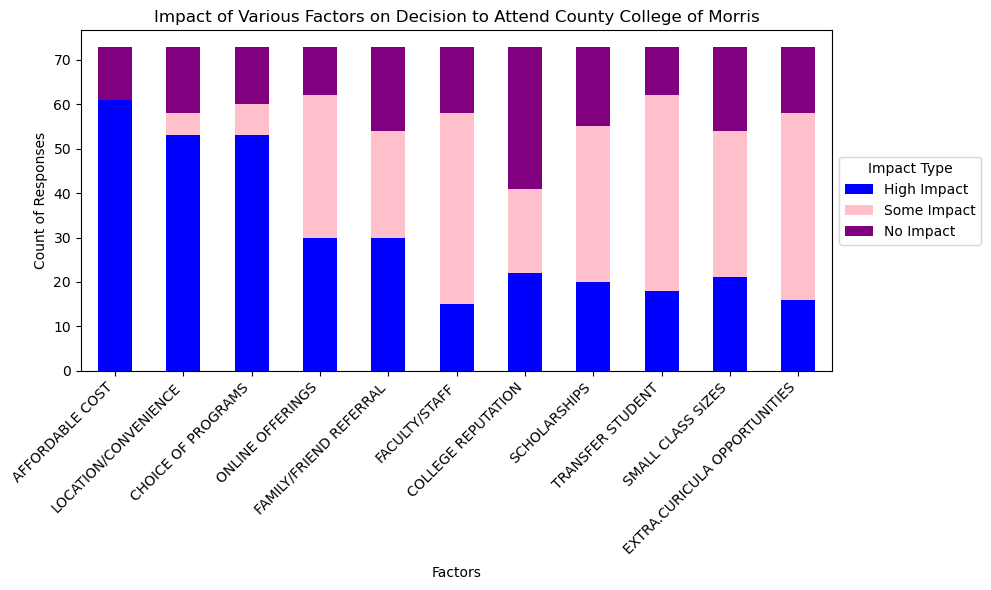

In [77]:
impact_counts = impactondecision.apply(pd.Series.value_counts).fillna(0).T

# stacking
impact_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink', 'purple'])

plt.title('Impact of Various Factors on Decision to Attend County College of Morris')
plt.xlabel('Factors')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
#move the legend to outside the plot to the right
plt.legend(title='Impact Type', labels=['High Impact', 'Some Impact', 'No Impact'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

 ## <font color="blue">Intepretation</font> ##
*What made the most impact on the decision to enroll at CCM?*

* Taking into account the responses (no impact and some impact) it can be concluded that all the factors have a significant impact on the decision 
* The top 3 factors that have the highest impact on the decision to attend CCM are the affordable cost, location or convenience and choice of programs
* The factor with the least impact is the College's reputation which also has the highest number of "No impact" responses
* Affordable cost haad no intermediate response it either had impact or it did not
  

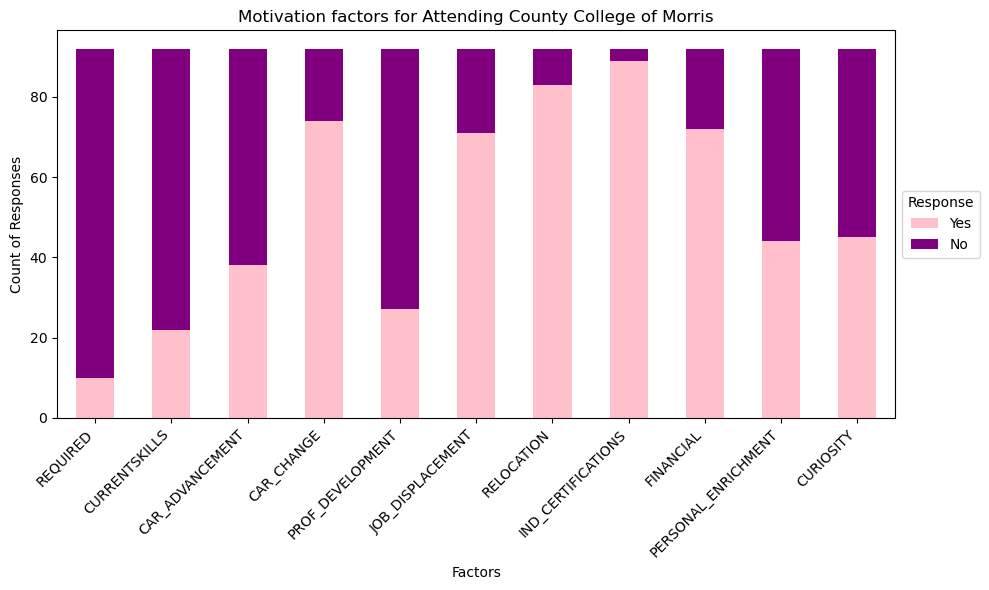

In [79]:
pullpushfactors = motivation.apply(pd.Series.value_counts).fillna(0).T

pullpushfactors.plot(kind='bar', stacked=True, figsize=(10, 6), color=['pink', 'purple'])

plt.title('Motivation factors for Attending County College of Morris')
plt.xlabel('Factors')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Response', labels=['Yes', 'No'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Intepretation ##
*What influences joining computing classes (the pull/ push factors)?*
* Career change, job displacement, relocation, industry certification and financial factors have the greatest influence in taking the computing class.
* These seem to be mostly push factors that motivate individuals adapt
* The factors with the least influence include the class being a requirement, updating current skills, career advancement and professional development
* Personal enrichment and curiosity have almost equal yes/no responses making the neutral factors

In [81]:
contingency_table1 = pd.crosstab(interestcorr['DEGREE'], interestcorr['LEVEL_OF_INTEREST'])
print(contingency_table1)

LEVEL_OF_INTEREST          1   2   3  4  5
DEGREE                                    
Analytics                  0   0   1  0  0
Creative Arts & Media      1   1   1  0  1
Health Sciences            5  14  13  4  6
Liberal Arts & Humanities  6   6  10  0  0
Non-Degree Program         1   0   2  0  0
STEM & Engineering         0   4   0  0  0
Social Sciences            4   2   7  2  1


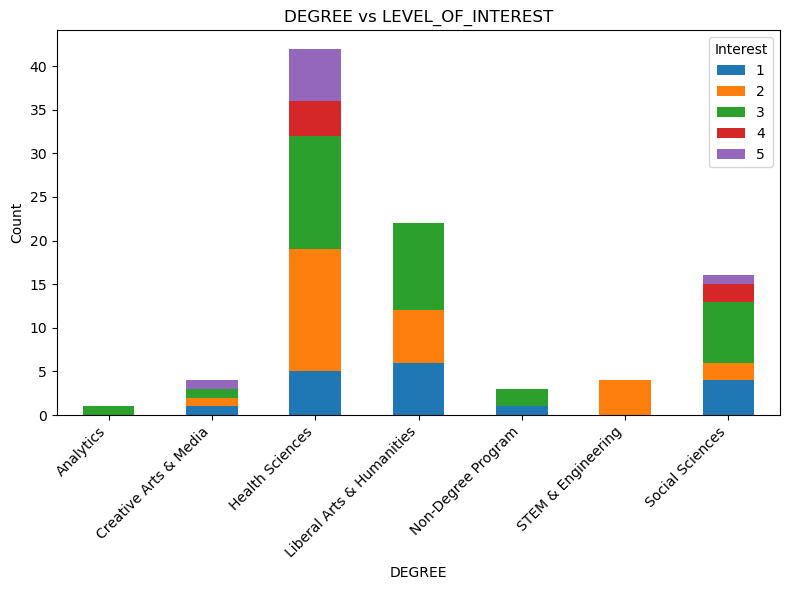

In [82]:
contingency_table1.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('DEGREE vs LEVEL_OF_INTEREST')
plt.xlabel('DEGREE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
plt.legend(title='Interest')
# Show the plot
plt.tight_layout()
plt.show()

 ## <font color="blue">Intepretation</font> ##

* What are the factors that are associated with high levels of interest (correlation)?*
* The Creative Arts & Media comprise of Broadcasting Arts and Technology and Culinary Arts and Sciences
* Health Science comprise of Radiology, Radiography, Criminal Justice, Psychology, child psychology, Child and Family Studies, Early Childhood Education and Fire Science.
* Social Sciences comprise of Criminal Justice, Psychology, child psychology, Child and Family Studies, Early Childhood Education and Fire Science
* Liberal Arts & Humanities group consists of Liberal Arts, Journalism, History Education, Communication and Musical Theatre
* Extreme interest in taking another computing class was found in the Creative Arts& Media, Health Sciences and Social Sciences (groups with high number of participants)
* Taking into account the degree programs that have significant, combined proportions of extreme, very and moderately interested responses also supports the view
* Liberal Arts & Humanities have a high proportion of no interest in proportion to all responses in that group
  

In [84]:
contingency_table2 = pd.crosstab(interestcorr['AGE'], interestcorr['LEVEL_OF_INTEREST'])
print(contingency_table2)

LEVEL_OF_INTEREST   1   2   3  4  5
AGE                                
18 and younger      2   4   4  2  2
19-20              11  14  15  3  1
21-24               3   5   7  0  2
25-34               1   3   3  1  3
35-64               0   1   5  0  0


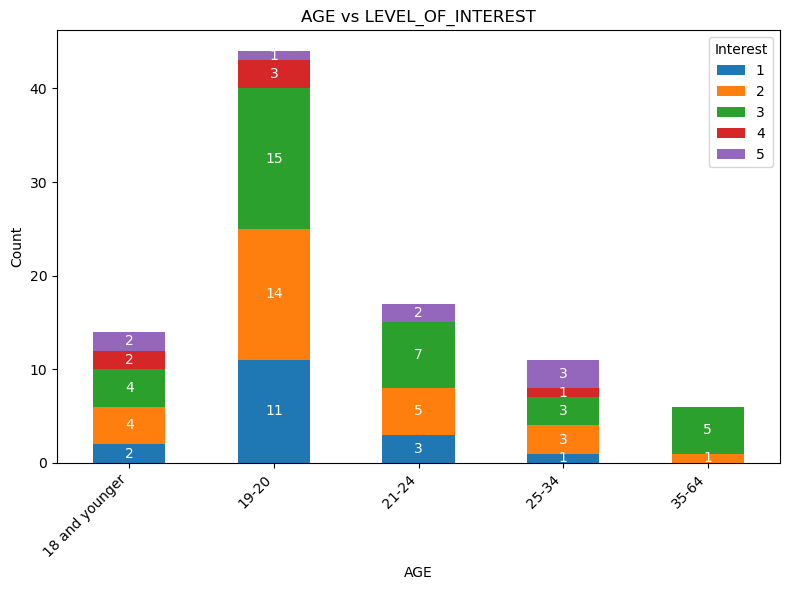

In [85]:
plotcount2 = contingency_table2.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('AGE vs LEVEL_OF_INTEREST')
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
plt.legend(title='Interest')
#Add counts inside the bars
for p in plotcount2.patches:
    # Get the height and width of each bar
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Position text in the middle of the bar
    
    # Get the cumulative height of stacked bars (if the bar has been stacked)
    y_position = p.get_y() + height / 2
    
    # If the bar height is non-zero, add the count inside the bar
    if height > 0:
        plotcount2.text(x_position, y_position, str(int(height)), ha='center', va='center', fontsize=10, color='white')
# Show the plot
plt.tight_layout()
plt.show()

## Intepretation ##
* The  highest response for the 35- 64 years age group was moderate interest
* a lotal of 8 resoonses indicate extremely interested which is a low number (~9%)
* the 18 and younger and 25-34 age group have significate combined proportion of moderate to extreme nterest (>50%)
* 19 - 20 year age group has the most no interest responses

In [87]:
contingency_table3 = pd.crosstab(interestcorr['GENDER'], interestcorr['LEVEL_OF_INTEREST'])
print(contingency_table3)

LEVEL_OF_INTEREST   1   2   3  4  5
GENDER                             
Man                 3   9  15  1  1
Non-binary          0   1   0  0  0
Prefer not to say   1   1   0  0  0
Woman              13  16  19  5  7


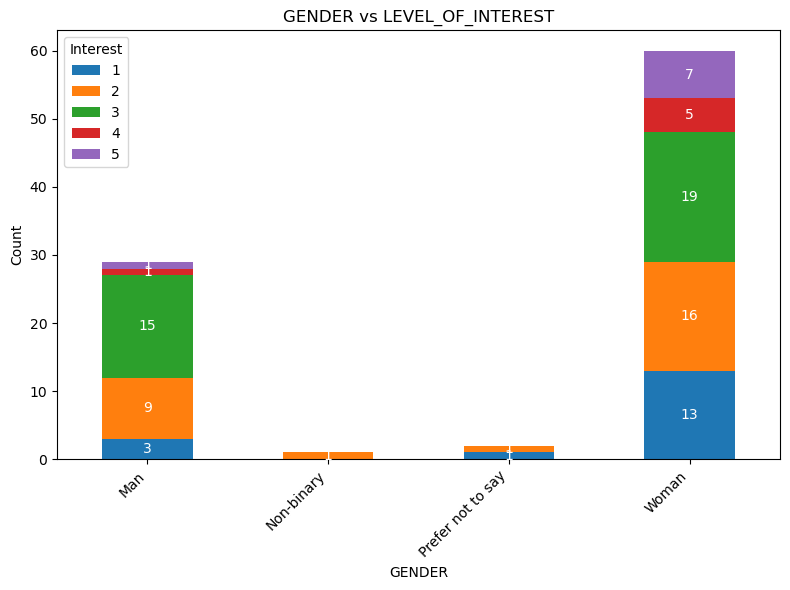

In [88]:
plotcount3 = contingency_table3.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('GENDER vs LEVEL_OF_INTEREST')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
plt.legend(title='Interest')

# Add counts inside the bars
for p in plotcount3.patches:
    # Get the height and width of each bar
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Position text in the middle of the bar
    
    # Get the cumulative height of stacked bars (if the bar has been stacked)
    y_position = p.get_y() + height / 2
    
    # If the bar height is non-zero, add the count inside the bar
    if height > 0:
        plotcount3.text(x_position, y_position, str(int(height)), ha='center', va='center', fontsize=10, color='white')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
# Show the plot
plt.show()


 ## <font color="blue">Intepretation</font> ##
* Slightly more males (58%) than female (52%) have moderate to extreeme interest in taking another computing class
* However, the female participants had proportionally high numbers of extremely interested responses
### Conclusion ### 
* Students from Creative Arts& Media, Health Sciences and Social Sciences groups are more interested in taking another computing class
* more female students are curently taking a computing class however their level of interest is slightly lower than their male counterparts thus indicating an area CCM can work towards improving

In [90]:
contingency_table4 = pd.crosstab(interestcorr['DEGREE'], interestcorr['COURSE'])
contingency_table4

COURSE,CMP 101 Computer Information Literacy,CMP 126 Computer Technology and Applications,CMP 135 Computer Concepts with Applications
DEGREE,,,
Analytics,0,1,0
Creative Arts & Media,0,4,0
Health Sciences,9,2,31
Liberal Arts & Humanities,8,12,2
Non-Degree Program,1,1,1
STEM & Engineering,0,0,4
Social Sciences,4,10,2


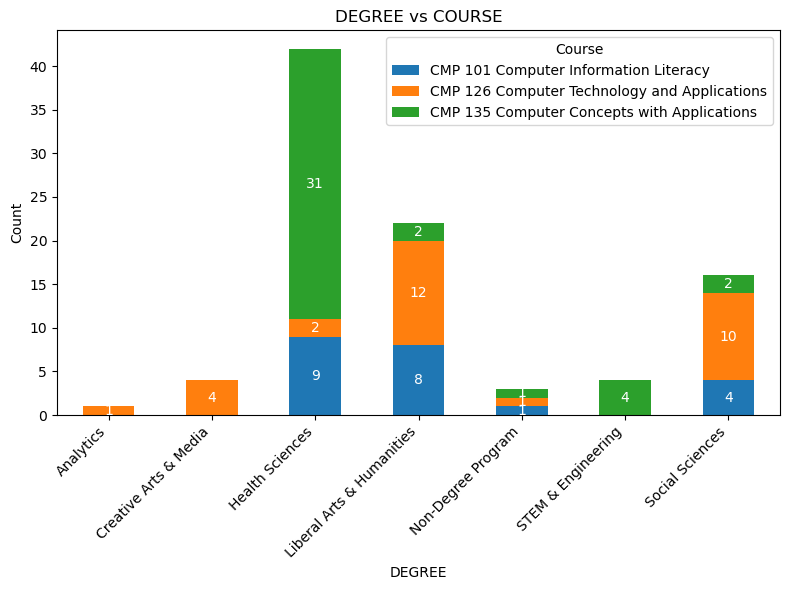

In [91]:
plotcount4 = contingency_table4.plot(kind='bar', stacked=True, figsize=(8, 6))

# Title and labels
plt.title('DEGREE vs COURSE')
plt.xlabel('DEGREE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
plt.legend(title='Course')

# Add counts inside the bars
for p in plotcount4.patches:
    # Get the height and width of each bar
    height = p.get_height()
    width = p.get_width()
    x_position = p.get_x() + width / 2  # Position text in the middle of the bar
    
    # Get the cumulative height of stacked bars (if the bar has been stacked)
    y_position = p.get_y() + height / 2
    
    # If the bar height is non-zero, add the count inside the bar
    if height > 0:
        plotcount4.text(x_position, y_position, str(int(height)), ha='center', va='center', fontsize=10, color='white')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
# Show the plot
plt.show()

## <font color="blue">Intepretation</font> ##
*For each course in the latest survey, what are the relative number of enrollments in the various degree programs? The degree field needs to be cleaned and condensed into a smaller number of categories. For example, all the engineering majors should be collapsed into a single engineering category.*
* Analytics and Creative Arts & Media groups were taking a class in Computer Concepts with Applications only whilst the STEM & Engenineering group only tool the Computer Concepts with Applications
* Health Science group had relatively more students taking the Computer Concepts with Applications (65%) and  Liberal Arts (55%) and Humanities and social (63%) had relatively more students taking the Computer Technology and Application class.
* Overall, 40 students took Computer Concepts with Applications(43.5%), 30students took Computer Technology and Application class (32.6%)and 22 students took Computer Information Literacy class (23.9%).

## References ##

Paul Deitel; Harvey M. *Intro to Python for Computer Science and Data Science*, https://online.vitalsource.com/reader/books/9780135404812/epubcfi/6/246%5B%3Bvnd.vst.idref%3DP7001016447000000000000000003405%5D!/4 p269, Accessed 20 February 2025

W3 School. *Pandas Tutorial*, https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_data.asp, Accessed 21 February 2025

W3 School. *Pandas Tutorial*,https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp, Accessed 21 February 2025

Contingency_table = pd.crosstab(df['Gender'], df['Purchased']): 1. ChatGPT, response to “Create a contigency table pandas,” March 9, 2025, ChatGPT, https://chatgpt.com/.

Stacked bar plot code: ChatGPT, response to “create stacked bar plot from contgency table,” March 10, 2025, ChatGPT, https://chatgpt.com/.

Code to add count inside of Stacked bar plot code: ChatGPT, response to “create stacked bar plot from contgency table,” March 11, 2025, ChatGPT, https://chatgpt.com/.
